# Lab | Customer Analysis Round 2

In [50]:
import pandas as pd
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [26]:
#Load data (file1.csv) in a new Jupyter notebook.
marketing_analysis = pd.read_csv("marketing_customer_analysis.csv")
marketing_analysis

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


# Dealing with the data

In [27]:
#Show the dataframe shape.
marketing_analysis.shape

(10910, 26)

In [28]:
#Standardize header names.
marketing_analysis= marketing_analysis.drop('Unnamed: 0', axis=True)
marketing_analysis

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [29]:
marketing_analysis.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type    

In [30]:
#Which columns are numerical?
marketing_analysis.select_dtypes(include=['int64','float64'] )

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [31]:
#Which columns are categorical?
marketing_analysis.select_dtypes(include='object' )

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [32]:
#Check and deal with NaN values.
conteo_nulos = marketing_analysis.isna().sum()
print(conteo_nulos.sort_values())

Customer                            0
Total Claim Amount                  0
Sales Channel                       0
Renew Offer Type                    0
Policy                              0
Policy Type                         0
Number of Policies                  0
Months Since Policy Inception       0
Marital Status                      0
Location Code                       0
Monthly Premium Auto                0
Gender                              0
EmploymentStatus                    0
Effective To Date                   0
Education                           0
Coverage                            0
Customer Lifetime Value             0
Income                              0
Vehicle Size                      622
Vehicle Class                     622
Response                          631
State                             631
Months Since Last Claim           633
Number of Open Complaints         633
Vehicle Type                     5482
dtype: int64


In [33]:
# Primero Vehicle Size y Vehicle Class como los valores estan en blanco los cambiare a desconocido

marketing_analysis[['Vehicle Size','Vehicle Class']]= marketing_analysis[['Vehicle Size','Vehicle Class']].fillna('Desconocido')


In [34]:
# Response tiene valores NA los cambiare por "Sin respuesta"
marketing_analysis[['Response']] = marketing_analysis[['Response']].fillna('Sin respuesta')



In [35]:
# State tiene valores NA los cambiare por "Sin estado definido"
marketing_analysis[['State']] = marketing_analysis[['State']].fillna('Sin estado definido')

In [36]:
# Con la informacion que se tiene lo mejor sera cambiar los NA a 0 en los dos casos.
# Ya que se carece de informacion
marketing_analysis[['Months Since Last Claim','Number of Open Complaints']]= marketing_analysis[['Months Since Last Claim','Number of Open Complaints']].fillna(0)

In [37]:
# Solo hay vehiculos de Typo A hay tanto Na son 5482 casi la mitad de la data

marketing_analysis['Vehicle Type'].unique()

array([nan, 'A'], dtype=object)

In [38]:
# Como no hay sufciente informacion relevante en esta columna ya que todos los tipos de vehiculo
# son A entonces opto por elminar la columna
marketing_analysis[['Vehicle Type']] = marketing_analysis[['Vehicle Type']].fillna('B')

In [39]:
conteo_nulos = marketing_analysis.isna().sum()
print(conteo_nulos.sort_values())

Customer                         0
Vehicle Class                    0
Total Claim Amount               0
Sales Channel                    0
Renew Offer Type                 0
Policy                           0
Policy Type                      0
Number of Policies               0
Number of Open Complaints        0
Months Since Policy Inception    0
Months Since Last Claim          0
Vehicle Size                     0
Monthly Premium Auto             0
Location Code                    0
Income                           0
Gender                           0
EmploymentStatus                 0
Effective To Date                0
Education                        0
Coverage                         0
Response                         0
Customer Lifetime Value          0
State                            0
Marital Status                   0
Vehicle Type                     0
dtype: int64


Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.


BONUS: Put all the previously mentioned data transformations into a function.

In [40]:
import pandas as pd
import numpy as np
import datetime

In [41]:
# funcion desde el principio
marketing_analysis['Effective To Date'] = pd.to_datetime(marketing_analysis['Effective To Date'])


In [42]:
marketing_analysis.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                 float64
Months Since Policy Inception             int64
Number of Open Complaints               float64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [43]:
marketing_analysis['Effective To Date']

0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
4       2011-01-17
           ...    
10905   2011-01-19
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
10909   2011-01-08
Name: Effective To Date, Length: 10910, dtype: datetime64[ns]

In [44]:
marketing_analysis["Month"] = (
    marketing_analysis["Effective To Date"].dt.month_name()
)

In [45]:
# Solo hay datos de enero y febrero
marketing_analysis["Month"].unique()

array(['February', 'January'], dtype=object)

In [46]:
marketing_analysis[
  (  (marketing_analysis['Month'] =='February') | (marketing_analysis['Month'] =='January') )
]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,B,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,B,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,B,February
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [48]:
marketing_analysis

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,B,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,B,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,B,February
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


# Explore data 


In [59]:
tabla_describe = marketing_analysis.describe().T

In [53]:
marketing_analysis.quantile([0,0.25,0.5,0.75,1]).T

,0.00,0.25,0.50,0.75,1.00
Customer Lifetime Value,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,0.000000,5.000000,13.000000,23.000000,35.000000
Months Since Policy Inception,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,0.099007,271.082527,382.564630,547.200000,2893.239678


In [62]:
tabla_describe['50%']

Customer Lifetime Value           5771.147235
Income                           33813.500000
Monthly Premium Auto                83.000000
Months Since Last Claim             13.000000
Months Since Policy Inception       48.000000
Number of Open Complaints            0.000000
Number of Policies                   2.000000
Total Claim Amount                 382.564630
Name: 50%, dtype: float64

<AxesSubplot:>

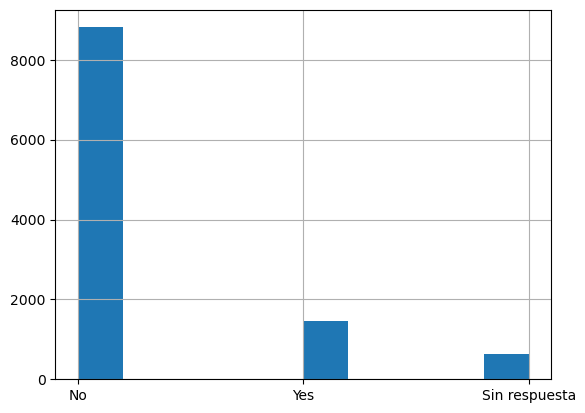

In [64]:
marketing_analysis['Response'].hist()

<AxesSubplot:xlabel='Sales Channel', ylabel='count'>

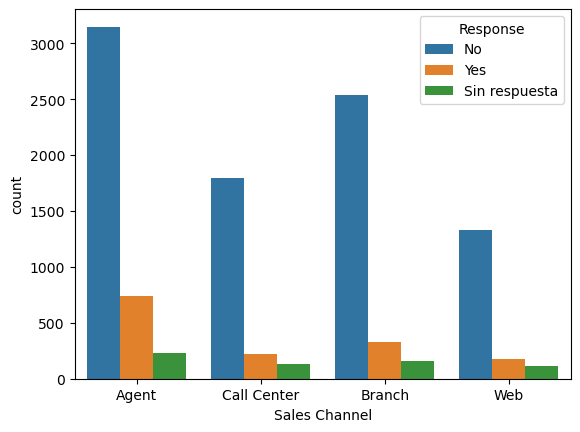

In [65]:
# Show a plot of the response rate by the sales channel.
sns.countplot(data=marketing_analysis, x="Sales Channel", hue="Response")


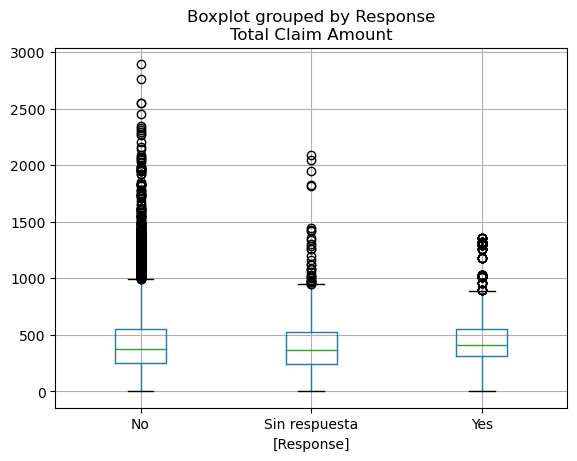

In [66]:
# Show a plot of the response rate by the total claim amount.
data_claim = marketing_analysis[['Response','Total Claim Amount']]
boxplot = data_claim.boxplot(by='Response')

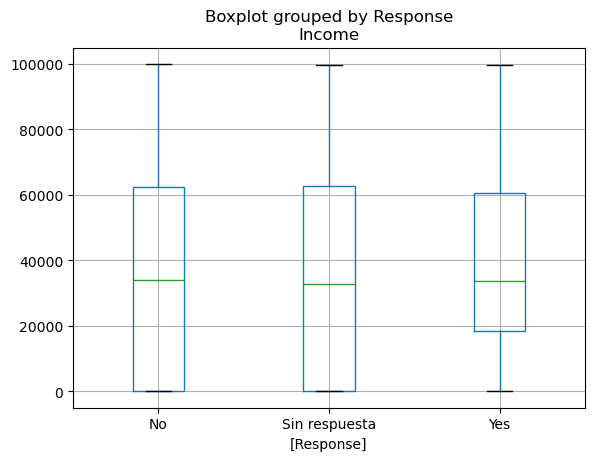

In [67]:
# Show a plot of the response rate by income.
data_claim = marketing_analysis[['Response','Income']]
boxplot = data_claim.boxplot(by='Response')

# Processing Data



In [69]:
#X-y split. 

y=marketing_analysis['Total Claim Amount']
X=marketing_analysis.drop(['Total Claim Amount'],axis=1)


In [72]:
X

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,B,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,B,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,B,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,0.0,7,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,B,February
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A,February


In [71]:
y

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: Total Claim Amount, Length: 10910, dtype: float64

In [73]:
X_num=X.select_dtypes(include=np.number)


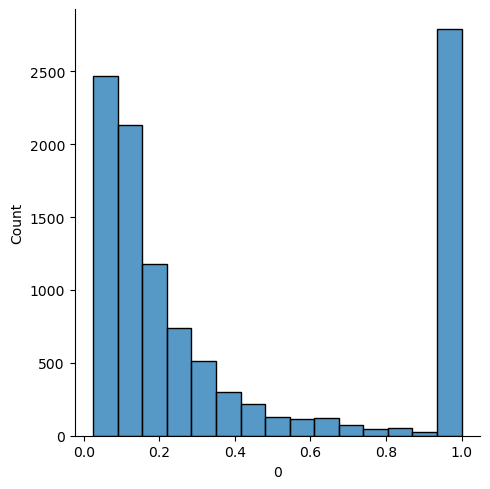

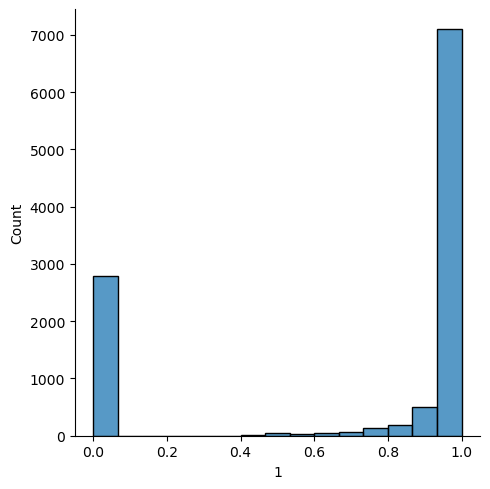

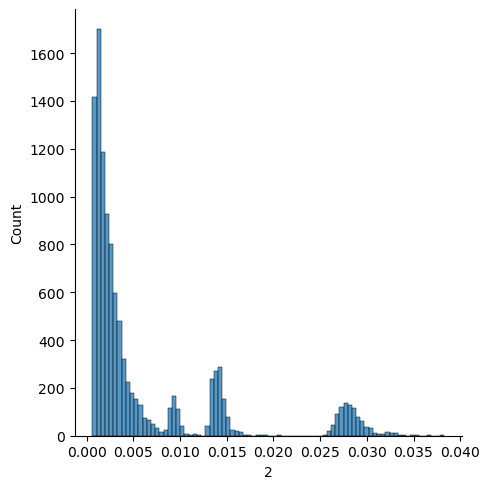

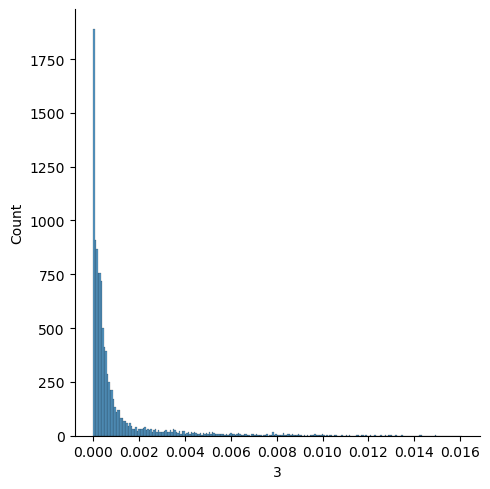

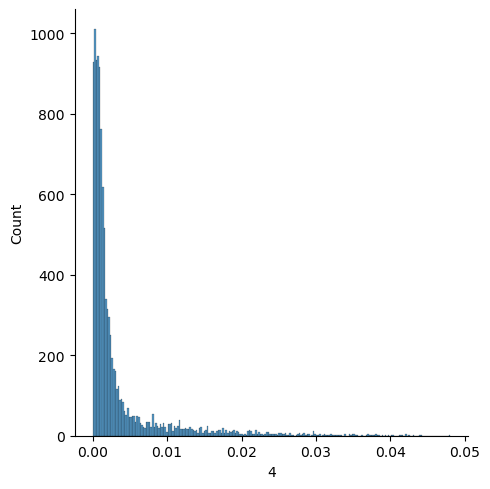

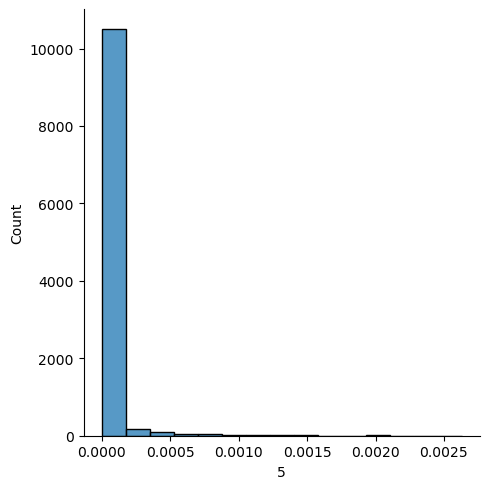

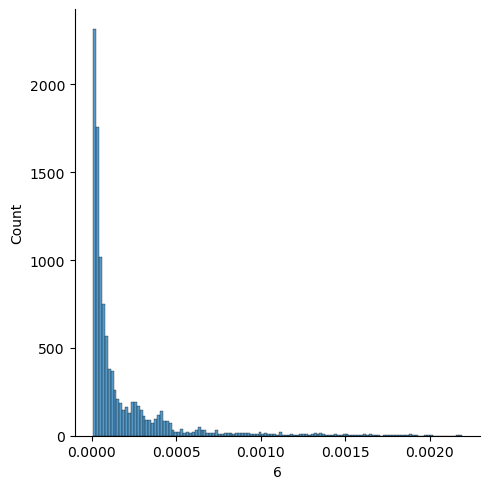

In [76]:
# Normalize (numerical).

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


transformer=Normalizer().fit(X_num)
x_normalized=transformer.transform(X_num)
x_normalized_df=pd.DataFrame(x_normalized)

for i in x_normalized_df.columns:
  sns.displot(x_normalized_df[i])

